In [1]:
import pandas as pd
import os
from geopy.distance import geodesic

In [2]:
buoy_df = pd.read_excel('./data/vessel_with_nearest_buoy.xlsx')
buoy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어선번호    7538 non-null   int64  
 1   어선명     7481 non-null   object 
 2   선적항     7538 non-null   object 
 3   위도      7538 non-null   float64
 4   경도      7538 non-null   float64
 5   지점명     7538 non-null   object 
 6   지점번호    7538 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 412.4+ KB


In [3]:
df_filtered = pd.read_csv('./data/mac_stat(110605_240729).csv',encoding='cp949')
df_filtered

C:\Users\한국품질재단\AppData\Local\Temp\ipykernel_11368\2076100.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtered = pd.read_csv('./data/mac_stat(110605_240729).csv',encoding='cp949')


,위판일자,경매장소코드,매수번호,매수일련번호,출하번호,어업코드,어업명,어선번호,어선명,상품코드,...,원산지구분명,출하수량,출하중량,출하금액,위판수량,위판단량,위판중량,위판단가,위판금액,등록일시
0,2024-07-29,001,76,7,969447,271,정치망어업,9.811004e+13,황영호,21000646,...,국산,225,567,2008110,1.0,5.0,5.0,42100.0,42100,2024-07-29
1,2024-07-29,001,76,8,969447,271,정치망어업,9.811004e+13,황영호,21000646,...,국산,225,567,2008110,1.0,5.0,5.0,37790.0,37790,2024-07-29
2,2024-07-29,001,76,6,969447,271,정치망어업,9.811004e+13,황영호,21000646,...,국산,225,567,2008110,6.0,5.0,30.0,48990.0,293940,2024-07-29
3,2024-07-29,001,76,5,969447,271,정치망어업,9.811004e+13,황영호,21000646,...,국산,225,567,2008110,1.0,5.0,5.0,56000.0,56000,2024-07-29
4,2024-07-29,001,75,4,969446,271,정치망어업,5.110026e+12,제7홍일호,21000646,...,국산,1484,3212,9483200,1.0,5.0,5.0,100000.0,100000,2024-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668495,2011-09-08,2,3,1,74931,131,대형트롤어업,9.610006e+13,27신화,21008452,...,국산,2630,49450,83780000,630.0,15.0,9450.0,6000.0,3780000,2015-12-04
668496,2011-08-30,2,1,9,74787,231,근해연승어업,2.040046e+12,202장덕호,21004204,...,국산,13,73,719000,1.0,5.0,5.0,5000.0,5000,2015-12-04
668497,2011-07-04,2,2,23,74391,181,근해안강망어업,7.020046e+12,제5백성호,21004204,...,국산,134,1069,9884000,1.0,5.0,5.0,36000.0,36000,2015-12-04
668498,2011-06-11,2,5,18,73885,182,연안개량안강망어업,1.050016e+12,77선경호,21004204,...,국산,165,340,2160400,3.0,5.0,15.0,28000.0,84000,2015-12-04


In [5]:
buoy_df_unique = buoy_df.drop_duplicates(subset=['어선명'])
buoy_df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4594 entries, 0 to 7537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어선번호    4594 non-null   int64  
 1   어선명     4593 non-null   object 
 2   선적항     4594 non-null   object 
 3   위도      4594 non-null   float64
 4   경도      4594 non-null   float64
 5   지점명     4594 non-null   object 
 6   지점번호    4594 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 287.1+ KB


In [6]:
columns_to_add = ['어선명', '지점명', '지점번호','위도','경도']
mack_df = df_filtered.merge(buoy_df_unique[columns_to_add], on='어선명', how='left', suffixes=('', '_buoy'))
mack_df['지점번호'] = mack_df['지점번호'].astype('Int64')

In [7]:
path = './data/hydroclimate_data/'
dir_list = os.listdir(path)
dir_list
hydro_climate = pd.DataFrame()
for dir in dir_list:
  tmp_df = pd.read_excel(path + dir)
  tmp_df = tmp_df.loc[:,tmp_df.columns[:6]]
  hydro_climate = pd.concat([hydro_climate,tmp_df])


In [8]:
list(mack_df.columns)
hydro_climate = hydro_climate.rename(columns = {'지점':'지점번호'})
mack_df = mack_df.rename(columns={'위판일자': '일자'})
mack_df.columns = mack_df.columns.str.strip()
hydro_climate.columns = hydro_climate.columns.str.strip()

In [9]:
columns_to_add = list(hydro_climate.columns)
columns_to_add

mack_df['일자'] = pd.to_datetime(mack_df['일자'])
hydro_climate['일자'] = pd.to_datetime(hydro_climate['일자'])


In [10]:
mack_hc_df = mack_df.merge(hydro_climate[columns_to_add], on=['지점번호','일자'], how='left', suffixes=('', '_hydro'))
mack_hc_df = mack_hc_df.loc[mack_hc_df['어선명'].isin(mack_hc_df['어선명'].dropna().unique()), :]
mack_hc_df = mack_hc_df.reset_index(drop=True)

In [11]:
mack_hc_df = mack_hc_df[
    (mack_hc_df['일자'] >= pd.Timestamp('2013-01-01')) &
    (mack_hc_df['일자'] <= pd.Timestamp('2023-12-31'))
]
mackerel_names = [
    '고등어(20미)', '고등어', '고등어류', '고등어(15미)', '기타고등어',
    '고등어(냉)', '고등어(선)', '고등어(냉동)', '선동고등어', '고등어(선망)',
    '고등어,소', '고등어류(선어)', '고등어(10kg이하)', '고등어(소)',
    '고등어(10-15kg)', '고등어(중)', '고등어(12)', '고등어(25미)',
    '고등어小', '고등어中', '고등어비급', '고등어,중', '고등어(상)', '(반.고등어)'
]

# 상품명 변경
mack_hc_df['상품명'] = mack_hc_df['상품명'].apply(lambda x: '고등어' if x in mackerel_names else x)
mack_hc_df = mack_hc_df[mack_hc_df['상품명'].isin(['고등어', '고등어大'])]

In [12]:
mack_hc_df.columns

Index(['일자', '경매장소코드', '매수번호', '매수일련번호', '출하번호', '어업코드', '어업명', '어선번호', '어선명',
       '상품코드', '상품명', '어종상태코드', '어종상태명', '산지코드', '산지명', '사업장명', '조합명',
       '원산지구분코드', '원산지구분명', '출하수량', '출하중량', '출하금액', '위판수량', '위판단량', '위판중량',
       '위판단가', '위판금액', '등록일시', '지점명', '지점번호', '위도', '경도', '평균기압', '평균 상대습도',
       '평균 기온', '평균 수온'],
      dtype='object')

In [13]:
#df_flt = mack_hc_df[['일자', '출하수량', '출하중량', '출하금액', '산지명',  '어업명', '어선번호', '어선명', '상품코드', '상품명', '산지코드','지점명', '지점번호', '위도', '경도', '평균기압', '평균 상대습도','평균 기온', '평균 수온', '평균 최대 파고', '평균 유의 파고', '최고 유의 파고', '최고 최대 파고','평균 파주기', '최고 파주기']]
df_flt = mack_hc_df[['일자', '출하수량', '출하중량', '출하금액', '산지명',  '어업명', '어선번호', '어선명', '상품코드', '상품명', '산지코드','지점명', '지점번호', '위도', '경도', '평균기압', '평균 상대습도','평균 기온', '평균 수온']]

In [14]:
from scipy.spatial import cKDTree

def is_valid_coord(lat, lon):
    return pd.notnull(lat) and pd.notnull(lon)

def build_kdtree(df, column):
    coords = df[['위도', '경도']].values
    tree = cKDTree(coords)
    return tree, coords

def fill_missing_values(df, column):
    filled_values = []
    grouped = df.groupby('일자')

    for date, group in grouped:
        valid_rows = group[
            group[column].notnull() &
            group['위도'].notnull() &
            group['경도'].notnull()
        ]

        if valid_rows.empty:
            filled_values.extend([None] * len(group))
            continue

        tree, valid_coords = build_kdtree(valid_rows, column)
        target_coords = group[['위도', '경도']].values

        distances, indices = tree.query(target_coords, k=1)

        for j, (i, row) in enumerate(group.iterrows()):
            if pd.notnull(row[column]):
                filled_values.append(row[column])
            elif is_valid_coord(row['위도'], row['경도']):
                nearest_idx = indices[j]
                if 0 <= nearest_idx < len(valid_rows):
                    filled_values.append(valid_rows.iloc[nearest_idx][column])
                else:
                    filled_values.append(None)
            else:
                filled_values.append(None)


    return filled_values

# 전처리
df_flt = df_flt[df_flt['산지명'].notnull()]
df_flt = df_flt[df_flt['지점명'].notnull()]

# 빠르게 결측치 채우기


In [15]:
columns_to_fill = [
    '평균기압', '평균 상대습도', '평균 기온', '평균 수온',
    # '평균 최대 파고', '평균 유의 파고', '최고 유의 파고',
    # '최고 최대 파고', '평균 파주기', '최고 파주기'
]

In [16]:
# #df_flt_test = df_flt.iloc[:100000,:]
# df_flt['산지명'].dropna().unique()
# df_flt = df_flt.loc[df_flt['산지명'].isin(df_flt['산지명'].dropna().unique()), :]
# df_flt = df_flt.loc[df_flt['지점명'].isin(df_flt['지점명'].dropna().unique()), :]

In [17]:
for col in columns_to_fill:
     print(f"수행 컬럼 : {col}")
     df_flt[col] = fill_missing_values(df_flt, col)

# 저장
df_flt.to_csv("./test1.csv", encoding='utf-8', index=False)


수행 컬럼 : 평균기압
수행 컬럼 : 평균 상대습도
수행 컬럼 : 평균 기온
수행 컬럼 : 평균 수온


In [18]:

df_new = df_flt.copy()
df_new = df_new[df_new['평균 수온'].notnull()]
df_new = df_new[df_new['평균 기온'].notnull()]
df_new = df_new[df_new['평균 상대습도'].notnull()]
df_new = df_new[df_new['평균기압'].notnull()]

In [19]:
import numpy as np 

def add_temp_category(df):
    conditions = [
        (df['평균 수온'] < 16.0),                    # 저수온
        (df['평균 수온'] >= 16.0) & (df['평균 수온'] <= 22.0),  # 적정수온
        (df['평균 수온'] > 22.0)                    # 고수온
    ]
    values = [1, 2, 3]

    df['적정 수온'] = np.select(conditions, values, default=np.nan)
    return df

In [20]:
def add_recent_frequencies(df, window_rows=60):
    """
    각 행에서 직전 window_rows 개 행을 기준으로
    '적정수온 == 1, 2, 3' 각각의 갯수를 세어
    '최근저수온빈도', '최근적정수온빈도', '최근고수온빈도' 컬럼으로 추가
    """
    out = df.copy().reset_index(drop=True)

    low_counts = []     # 저수온 빈도 (적정수온 == 1)
    optimal_counts = [] # 적정수온 빈도 (적정수온 == 2)
    high_counts = []    # 고수온 빈도 (적정수온 == 3)

    for i in range(len(out)):
        if i < window_rows:  
            # 초기 구간은 NaN
            low_counts.append(np.nan)
            optimal_counts.append(np.nan)
            high_counts.append(np.nan)
        else:
            # 직전 window_rows 구간 추출
            window = out.iloc[i-window_rows:i]

            low_counts.append((window['적정 수온'] == 1).sum())
            optimal_counts.append((window['적정 수온'] == 2).sum())
            high_counts.append((window['적정 수온'] == 3).sum())

    out['최근저수온빈도'] = low_counts
    out['최근적정수온빈도'] = optimal_counts
    out['최근고수온빈도'] = high_counts

    return out


In [21]:
df_new = add_temp_category(df_new)

In [22]:
df_new_2 = add_recent_frequencies(df_new)

In [23]:
df_new_2.to_csv('./mackerel_fishery_combined_hydroclimate_V5.csv', encoding='utf-8',index=False)

In [24]:
df_new_2.loc[df_new_2['지점번호'] == 22311,:]

,일자,출하수량,출하중량,출하금액,산지명,어업명,어선번호,어선명,상품코드,상품명,...,위도,경도,평균기압,평균 상대습도,평균 기온,평균 수온,적정 수온,최근저수온빈도,최근적정수온빈도,최근고수온빈도
24,2023-12-31,232,3584,52187000,전라남도,근해자망어업,1.205004e+13,동진호,21003079,고등어,...,37.186920,129.300850,1024.1,49.0,-0.7,11.5,1.0,NaN,NaN,NaN
28,2023-12-31,232,3584,52187000,전라남도,근해자망어업,1.205004e+13,동진호,21003079,고등어,...,37.186920,129.300850,1024.1,49.0,-0.7,11.5,1.0,NaN,NaN,NaN
29,2023-12-31,24,180,4062800,강원도,정치망어업,1.605004e+13,77성진호,21003079,고등어,...,37.449874,129.165297,1024.1,49.0,-0.7,11.5,1.0,NaN,NaN,NaN
102,2023-12-30,466,715,2923200,강원도,정치망어업,6.090016e+12,대일호,21003757,고등어,...,37.524514,129.114630,1028.9,61.0,7.5,16.5,2.0,46.0,14.0,0.0
103,2023-12-30,466,715,2923200,강원도,정치망어업,6.090016e+12,대일호,21003757,고등어,...,37.524514,129.114630,1028.9,61.0,7.5,16.5,2.0,45.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567838,2013-01-04,279,1445,5059280,강원도,정치망어업,2.110016e+12,제2황영호,21000646,고등어,...,37.524514,129.114630,1016.9,56.0,10.2,14.0,1.0,58.0,2.0,0.0
567946,2013-01-02,2,2,243000,경북 포항시,연안자망어업,4.050026e+12,연수호,21004762,고등어,...,37.449874,129.165297,1017.2,76.0,15.8,18.6,2.0,14.0,46.0,0.0
567947,2013-01-02,5,42,74000,경북 포항시,연안자망어업,4.080166e+12,창성호,21004762,고등어,...,37.524514,129.114630,1015.8,82.0,7.5,10.3,1.0,14.0,46.0,0.0
567962,2013-01-02,5,44,207000,강원도,정치망어업,9.610002e+13,진양호,21002629,고등어,...,37.449874,129.165297,1025.2,62.0,8.6,15.1,1.0,16.0,44.0,0.0


In [25]:
df_new_2.groupby(by=['일자','지점명','상품명']).agg({
    '지점번호' : 'mean',
    '출하수량': 'sum',
    '출하중량': 'sum',
    '출하금액': 'sum',
    '평균기압' : 'mean',
    '평균 기온': 'mean',
    '평균 수온': 'mean',
    '적정 수온': 'mean',
    '최근저수온빈도' : 'mean',
    '최근적정수온빈도' : 'mean',
    '최근고수온빈도' : 'mean',
}).reset_index().to_csv('./test2.csv', encoding='utf-8', index=False)


In [26]:
df2 = df_new_2.groupby(by=['일자','지점명','상품명']).agg({
    '지점번호' : 'mean',
    '출하수량': 'sum',
    '출하중량': 'sum',
    '출하금액': 'sum',
    '평균기압' : 'mean',
    '평균 기온': 'mean',
    '평균 수온': 'mean',
    '적정 수온': 'mean',
    '최근저수온빈도' : 'mean',
    '최근적정수온빈도' : 'mean',
    '최근고수온빈도' : 'mean',
}).reset_index()

In [27]:
m_df = pd.read_excel('./data/add_freq_Marado.xlsx')
p_df = pd.read_excel('./data/add_freq_Pohang.xlsx')

In [28]:
m_df

,일자,지점번호,평균기압,평균 상대습도,평균 기온,평균 수온,적정수온,최근적정수온빈도,최근저수온빈도,최근고수온빈도
0,2012-07-01,22107,1006.7,96.0,23.2,22.4,3,NaN,NaN,NaN
1,2012-07-02,22107,1004.1,97.0,23.6,22.5,3,NaN,NaN,NaN
2,2012-07-03,22107,1002.6,95.0,23.6,22.7,3,NaN,NaN,NaN
3,2012-07-04,22107,1005.5,94.0,24.4,22.9,3,NaN,NaN,NaN
4,2012-07-05,22107,1007.0,98.0,24.9,23.1,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4170,2023-12-15,22107,1018.4,84.0,4.9,19.8,2,36.0,0.0,24.0
4171,2023-12-16,22107,1028.3,75.0,5.1,19.6,2,37.0,0.0,23.0
4172,2023-12-17,22107,1035.2,73.0,5.2,19.4,2,38.0,0.0,22.0
4173,2023-12-18,22107,1035.2,72.0,6.3,19.4,2,39.0,0.0,21.0


In [29]:
shipment_summary = (
    mack_df.groupby(['일자', '지점번호'])[['출하수량', '출하중량', '출하금액']]
    .sum()
    .reset_index()
)
shipment_summary['일자'] = pd.to_datetime(shipment_summary['일자'])

In [30]:
shipment_summary.loc[shipment_summary['지점번호'] == 22107,:]
m_df['지점번호']

0       22107
1       22107
2       22107
3       22107
4       22107
        ...  
4170    22107
4171    22107
4172    22107
4173    22107
4174    22107
Name: 지점번호, Length: 4175, dtype: int64

In [31]:
mara_df = pd.merge(
    m_df,
    shipment_summary.loc[shipment_summary['지점번호'] == 22107,:],
    on=['일자', '지점번호'],
    how='left'  # m_df 기준으로 병합
)
mara_df.to_excel('./freq_Marado.xlsx',index=False)

In [32]:
poh_df = pd.merge(
    p_df,
    shipment_summary.loc[shipment_summary['지점번호'] == 22106,:],
    on=['일자', '지점번호'],
    how='left'  # m_df 기준으로 병합
)
poh_df.to_excel('./freq_Pohang.xlsx',index=False)

In [33]:
mara_df

,일자,지점번호,평균기압,평균 상대습도,평균 기온,평균 수온,적정수온,최근적정수온빈도,최근저수온빈도,최근고수온빈도,출하수량,출하중량,출하금액
0,2012-07-01,22107,1006.7,96.0,23.2,22.4,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-07-02,22107,1004.1,97.0,23.6,22.5,3,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-07-03,22107,1002.6,95.0,23.6,22.7,3,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-07-04,22107,1005.5,94.0,24.4,22.9,3,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-07-05,22107,1007.0,98.0,24.9,23.1,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,2023-12-15,22107,1018.4,84.0,4.9,19.8,2,36.0,0.0,24.0,2374.0,27505.0,275209900.0
4171,2023-12-16,22107,1028.3,75.0,5.1,19.6,2,37.0,0.0,23.0,1005.0,13740.0,154674600.0
4172,2023-12-17,22107,1035.2,73.0,5.2,19.4,2,38.0,0.0,22.0,NaN,NaN,NaN
4173,2023-12-18,22107,1035.2,72.0,6.3,19.4,2,39.0,0.0,21.0,14.0,138.0,1323120.0


In [34]:
df_22107_out = mara_df.copy()
df_22106_out = poh_df.copy()

In [35]:
# '일자' 컬럼을 'yyyy-mm' 형식으로 변환
df_22107_out['년월'] = df_22107_out['일자'].dt.to_period('M').astype(str) #마라도
df_22106_out['년월'] = df_22106_out['일자'].dt.to_period('M').astype(str) #포항

def group_ym(df): 
  return df.groupby('년월').agg({
    '지점번호': 'first',           # 또는 'mean', 'mode' 등 원하는 방식
    '평균기압': 'mean',
    '평균 상대습도': 'mean',
    '평균 기온': 'mean',
    '평균 수온': 'mean',
    '적정수온': 'mean',
    '최근적정수온빈도': 'mean',
    '최근저수온빈도': 'mean',
    '최근고수온빈도': 'mean',
    '출하수량': 'sum',
    '출하중량': 'sum',
    '출하금액': 'sum'
}).reset_index()


mar_grp = group_ym(df_22107_out).loc[6:,:]
poh_grp = group_ym(df_22106_out).loc[6:,:]

In [36]:
mar_test = df_22107_out.loc[df_22107_out['년월'] >= '2013-01',:].dropna()
poh_test = df_22106_out.loc[df_22106_out['년월'] >= '2013-01',:].dropna()
mar_test.to_excel('./mar_test.xlsx',index=False)
poh_test.to_excel('./poh_test.xlsx',index=False)

In [40]:
poh_test.to_excel("./분석용_일별_포항데이터.xlsx", index= False)

In [41]:
mar_test.to_excel("./분석용_일별_마라도데이터.xlsx", index= False)

In [37]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
### 한글처리(시각화 시 그래프 내에 한글이 포함되는 경우 한글 깨짐 현상 방지)
plt.rc("font", family="Malgun Gothic")

### 특수기호(마이너스 기호) 처리
plt.rcParams["axes.unicode_minus"] = False


# 분석 대상 컬럼 (출하중량 제외)
features = [
    '평균기압','평균 상대습도',	'평균 기온','평균 수온','적정수온',	'최근적정수온빈도','최근저수온빈도','최근고수온빈도'

]
target = '출하중량'

X = mar_test[features]
y = mar_test[target]

# ───────────────────────────────
# 1) 피어슨, 스피어만 상관계수
# ───────────────────────────────
pearson_corr = X.corrwith(y, method='pearson')
spearman_corr = X.corrwith(y, method='spearman')

# ───────────────────────────────
# 2) Mutual Information (비선형 포함)
# ───────────────────────────────
# 스케일링 (MI는 스케일 영향 안 받지만, 수치 안정성을 위해 권장)
X_scaled = StandardScaler().fit_transform(X)

mi_scores = mutual_info_regression(X_scaled, y, random_state=0)
mi_series = pd.Series(mi_scores, index=features)

# ───────────────────────────────
# 3) 통합 결과 테이블
# ───────────────────────────────
result = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr,
    'Mutual_Info': mi_series
}).sort_values(by='Mutual_Info', ascending=False)

print(result)

# ───────────────────────────────
# 4) 시각화 (선택)
# ───────────────────────────────
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))

result['Pearson'].plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title("출하중량 vs 변수 (Pearson)")
axes[0].set_ylabel("상관계수")

result['Spearman'].plot.bar(ax=axes[1], color='lightgreen')
axes[1].set_title("출하중량 vs 변수 (Spearman)")
axes[1].set_ylabel("상관계수")

result['Mutual_Info'].plot.bar(ax=axes[2], color='salmon')
axes[2].set_title("출하중량 vs 변수 (Mutual Information)")
axes[2].set_ylabel("MI Score")

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

           Pearson  Spearman  Mutual_Info
최근저수온빈도  -0.244591 -0.418219     0.128689
최근고수온빈도   0.251367  0.391007     0.090721
적정수온      0.178268  0.314649     0.073962
평균 수온     0.193406  0.327767     0.069750
최근적정수온빈도  0.037895  0.200375     0.038462
평균 상대습도   0.017368  0.017728     0.019631
평균 기온     0.111924  0.188630     0.017405
평균기압      0.009803  0.010795     0.017257


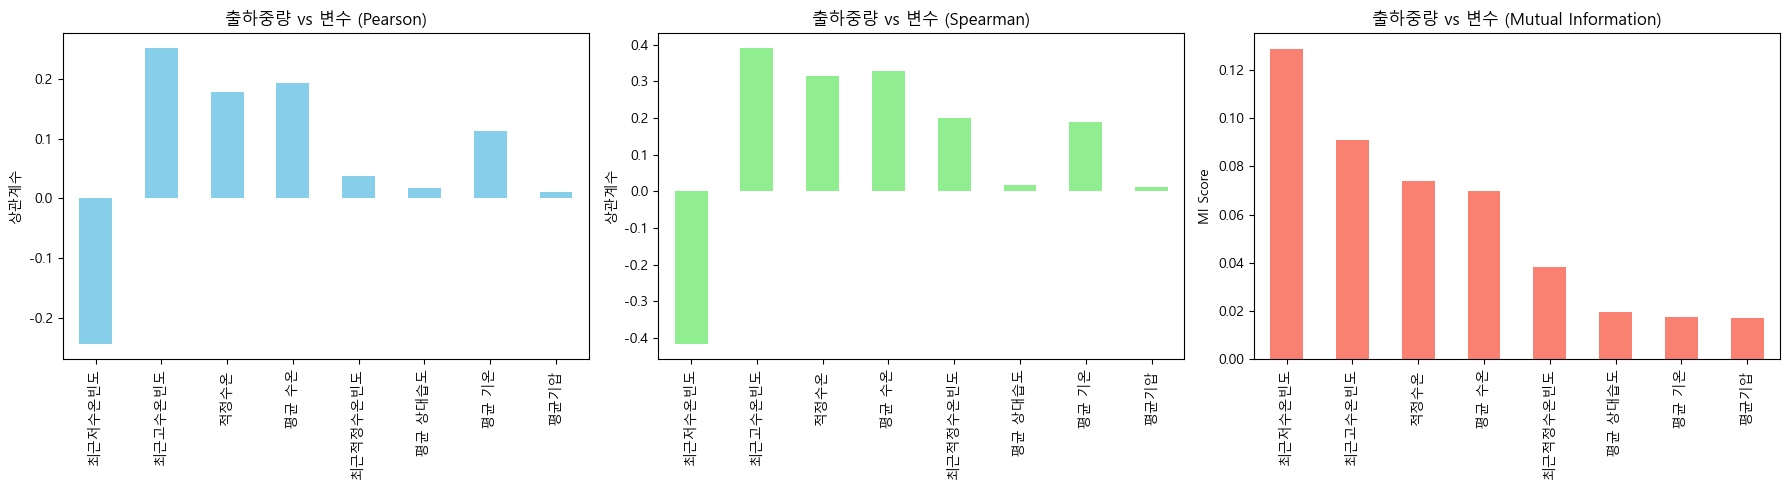

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
### 한글처리(시각화 시 그래프 내에 한글이 포함되는 경우 한글 깨짐 현상 방지)
plt.rc("font", family="Malgun Gothic")

### 특수기호(마이너스 기호) 처리
plt.rcParams["axes.unicode_minus"] = False


# 분석 대상 컬럼 (출하중량 제외)
features = [
    '평균기압','평균 상대습도',	'평균 기온','평균 수온','적정수온',	'최근적정수온빈도','최근저수온빈도','최근고수온빈도'
]
target = '출하중량'

X = poh_test[features]
y = poh_test[target]

# ───────────────────────────────
# 1) 피어슨, 스피어만 상관계수
# ───────────────────────────────
pearson_corr = X.corrwith(y, method='pearson')
spearman_corr = X.corrwith(y, method='spearman')

# ───────────────────────────────
# 2) Mutual Information (비선형 포함)
# ───────────────────────────────
# 스케일링 (MI는 스케일 영향 안 받지만, 수치 안정성을 위해 권장)
X_scaled = StandardScaler().fit_transform(X)

mi_scores = mutual_info_regression(X_scaled, y, random_state=0)
mi_series = pd.Series(mi_scores, index=features)

# ───────────────────────────────
# 3) 통합 결과 테이블
# ───────────────────────────────
result = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr,
    'Mutual_Info': mi_series
}).sort_values(by='Mutual_Info', ascending=False)

print(result)

# ───────────────────────────────
# 4) 시각화 (선택)
# ───────────────────────────────
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))

result['Pearson'].plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title("출하중량 vs 변수 (Pearson)")
axes[0].set_ylabel("상관계수")

result['Spearman'].plot.bar(ax=axes[1], color='lightgreen')
axes[1].set_title("출하중량 vs 변수 (Spearman)")
axes[1].set_ylabel("상관계수")

result['Mutual_Info'].plot.bar(ax=axes[2], color='salmon')
axes[2].set_title("출하중량 vs 변수 (Mutual Information)")
axes[2].set_ylabel("MI Score")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# ===== 분석 대상 =====
df = mar_test.copy()
target = '출하중량'
features = [
    '평균기압','평균 상대습도',	'평균 기온','평균 수온','적정수온',	'최근적정수온빈도','최근저수온빈도','최근고수온빈도'
]

n_permutations = 1000
random_state = 0

# ===== Mutual Information + permutation p-value =====
def mi_perm_test_1d(x, y, n_perm=1000, rs=0):
    mask = (~np.isnan(x)) & (~np.isnan(y))
    x_ = x[mask].reshape(-1, 1)
    y_ = y[mask]
    if len(y_) < 5 or np.nanstd(x_) == 0:
        return np.nan, np.nan

    X_scaled = StandardScaler().fit_transform(x_)

    rng = np.random.RandomState(rs)
    mi_true = mutual_info_regression(X_scaled, y_, random_state=rs)[0]

    null = []
    for _ in range(n_perm):
        y_perm = rng.permutation(y_)
        mi_perm = mutual_info_regression(X_scaled, y_perm, random_state=rs)[0]
        null.append(mi_perm)
    null = np.array(null)
    p_val = (null >= mi_true).mean()
    return mi_true, p_val

# ===== 래그 적용용 데이터 준비 =====
df['_date'] = pd.to_datetime(df['일자']) 
df = df.sort_values('_date').reset_index(drop=True)

lags = range(-10, 11)  # -10일 ~ +10일

rows = []

for lag in lags:
    df_lag = df.copy()
    
    for col in features:
        df_lag[f'{col}_lag{lag}'] = df_lag[col].shift(-lag)  # lag가 음수면 미래, 양수면 과거

    Xcols = [f'{col}_lag{lag}' for col in features]
    valid = df_lag[[target] + Xcols].dropna().index

    if len(valid) < 8:
        continue

    y_vec = df_lag.loc[valid, target].to_numpy()

    for col in features:
        x_vec = df_lag.loc[valid, f'{col}_lag{lag}'].to_numpy()

        try:
            pr, pr_p = pearsonr(x_vec, y_vec)
        except Exception:
            pr, pr_p = (np.nan, np.nan)

        try:
            sr, sr_p = spearmanr(x_vec, y_vec)
        except Exception:
            sr, sr_p = (np.nan, np.nan)

        mi, mi_p = mi_perm_test_1d(x_vec, y_vec,
                                   n_perm=n_permutations,
                                   rs=random_state)

        rows.append({
            'Variable': col,
            'Lag': lag,
            'n': len(y_vec),
            'Pearson': pr, 'Pearson_p': pr_p,
            'Spearman': sr, 'Spearman_p': sr_p,
            'MI': mi, 'MI_p': mi_p
        })


# ===== 결과 정리 =====
result_lag = pd.DataFrame(rows)

# 보기 좋게 정렬
result_lag = result_lag.sort_values(['Variable','Lag']).reset_index(drop=True)

# 결과 출력
print(result_lag.head(20))

# MI 기준 상위 변수 보기
print("\n🔎 Mutual Information 기준 Top 10")
print(result_lag.sort_values('MI', ascending=False).head(10))

# 필요 시 저장
result_lag.to_excel("lagged_correlation_analysis_MAR_dbd.xlsx", index=False)

   Variable  Lag     n   Pearson  Pearson_p  Spearman  Spearman_p        MI  \
0      적정수온  -10  3369  0.069786   0.000050  0.062414    0.000289  0.025067   
1      적정수온   -9  3370  0.078101   0.000006  0.064351    0.000185  0.028974   
2      적정수온   -8  3371  0.080612   0.000003  0.064231    0.000190  0.036769   
3      적정수온   -7  3372  0.082947   0.000001  0.066560    0.000110  0.038183   
4      적정수온   -6  3373  0.078388   0.000005  0.065486    0.000141  0.033682   
5      적정수온   -5  3374  0.077660   0.000006  0.065944    0.000126  0.036329   
6      적정수온   -4  3375  0.079621   0.000004  0.068480    0.000068  0.028924   
7      적정수온   -3  3376  0.083185   0.000001  0.063353    0.000230  0.044323   
8      적정수온   -2  3377  0.081006   0.000002  0.065061    0.000155  0.047322   
9      적정수온   -1  3378  0.080263   0.000003  0.066270    0.000116  0.038123   
10     적정수온    0  3379  0.082138   0.000002  0.062340    0.000288  0.037008   
11     적정수온    1  3378  0.079358   0.000004  0.06031

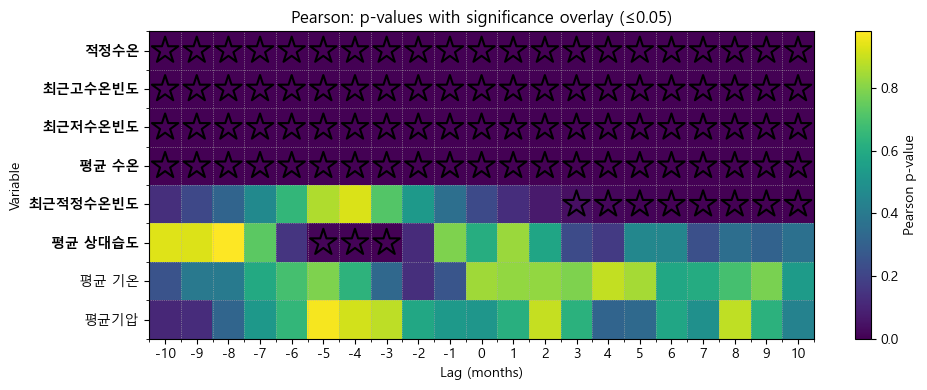

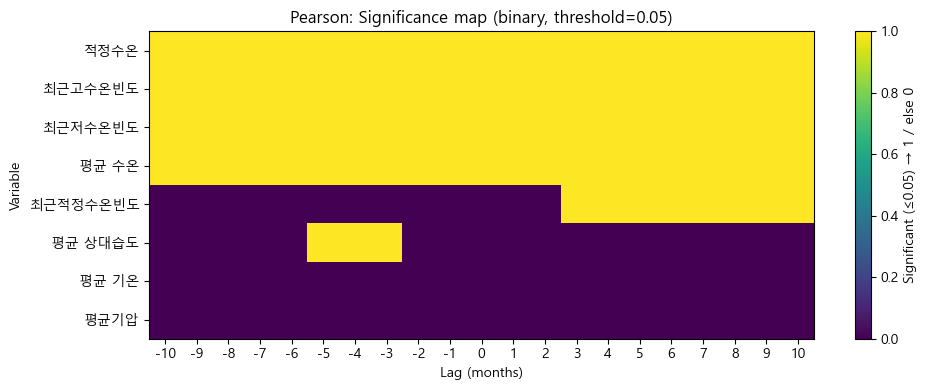

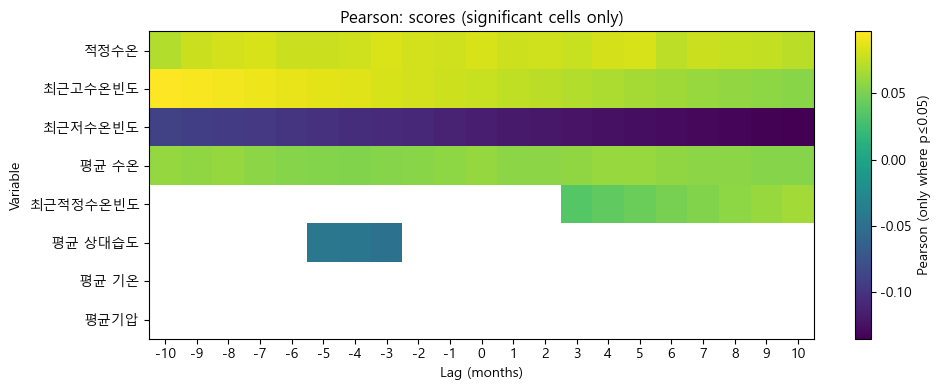

🔎 Pearson 유의성 요약 (임계=0.05)


,n_sig_lags,best_p,best_lag
Variable,,,
최근저수온빈도,21,3.896205e-15,10
최근고수온빈도,21,1.937155e-08,-10
적정수온,21,1.298914e-06,-3
평균 수온,21,3.673164e-04,5
최근적정수온빈도,8,1.771546e-04,10
평균 상대습도,3,4.559880e-03,-3
평균기압,0,1.094256e-01,-10
평균 기온,0,1.328668e-01,-2


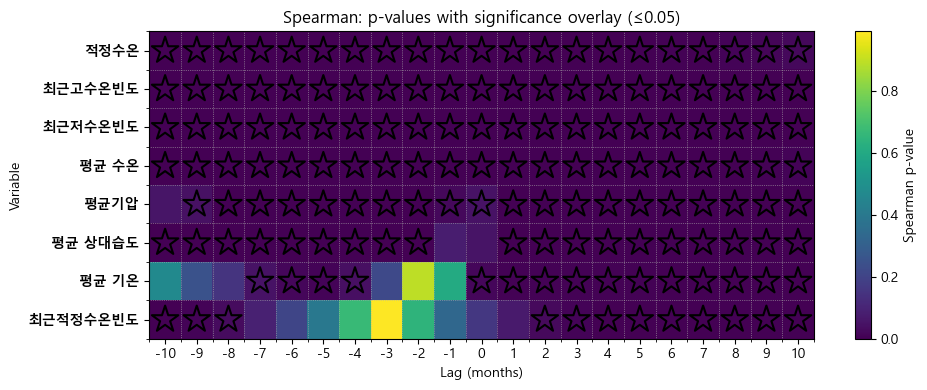

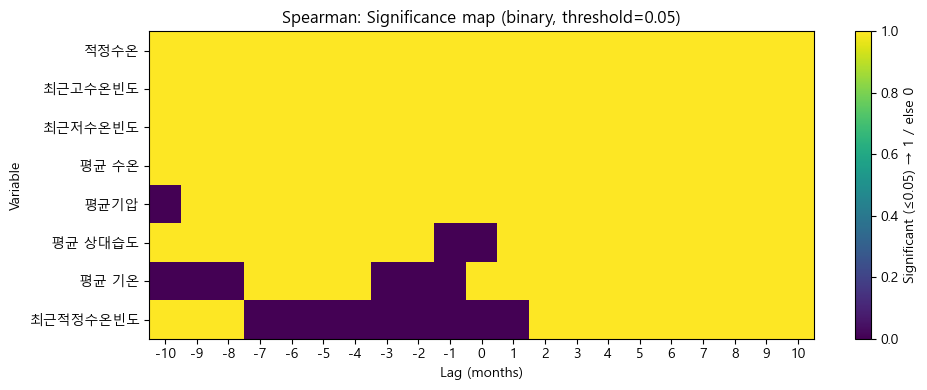

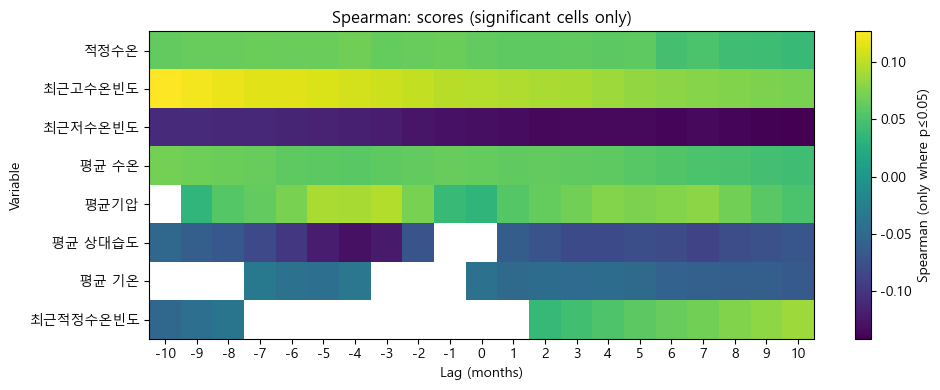

🔎 Spearman 유의성 요약 (임계=0.05)


,n_sig_lags,best_p,best_lag
Variable,,,
최근저수온빈도,21,1.099329e-16,10
최근고수온빈도,21,1.222380e-13,-10
평균 수온,21,4.203168e-05,-10
적정수온,21,6.847672e-05,-4
평균기압,20,2.032593e-08,-3
평균 상대습도,19,3.422128e-14,-4
평균 기온,15,1.326978e-04,10
최근적정수온빈도,12,3.519908e-07,10


In [ ]:

def plot_sig_maps_striking(result_lag, metric_name, thresh=0.05):
    """
    result_lag: columns ['Variable','Lag', metric, metric+'_p'] 필요
    metric_name: 'Pearson' | 'Spearman' | 'MI'
    thresh: 유의수준 (기본 0.05)
    """
    val_col = metric_name
    p_col   = f"{metric_name}_p"

    # 1) 피벗
    v_pivot = result_lag.pivot_table(index='Variable', columns='Lag', values=val_col, aggfunc='first')
    p_pivot = result_lag.pivot_table(index='Variable', columns='Lag', values=p_col,   aggfunc='first')

    # 2) 유의성 기준 및 정렬
    sig_bool = (p_pivot <= thresh)
    sig_counts = sig_bool.sum(axis=1)

    # 정렬: 유의한 lag 개수 ↓, 최저 p ↑
    order = (sig_counts.sort_values(ascending=False)
                        .index.to_series()
                        .reindex(sig_counts.index)
                        .index)
    # 위 한 줄은 pandas 버전에 따라 경고가 나올 수 있으니 더 견고하게:
    order = sig_counts.sort_values(ascending=False).index

    v_pivot = v_pivot.loc[order]
    p_pivot = p_pivot.loc[order]
    sig_bool = sig_bool.loc[order]

    # 3) p-value 히트맵 + ★ 오버레이 (p≤thresh)
    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im = ax.imshow(p_pivot.values, aspect='auto')  # 기본 컬러맵 사용
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f'{metric_name} p-value')

    # 축 라벨
    ax.set_xticks(np.arange(p_pivot.shape[1]))
    ax.set_xticklabels(p_pivot.columns)
    ax.set_yticks(np.arange(p_pivot.shape[0]))
    ax.set_yticklabels(p_pivot.index)

    ax.set_title(f'{metric_name}: p-values with significance overlay (≤{thresh})')
    ax.set_xlabel('Lag (months)')
    ax.set_ylabel('Variable')

    # 그리드(가로/세로) 약하게 추가
    ax.set_xticks(np.arange(-.5, p_pivot.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, p_pivot.shape[0], 1), minor=True)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)

    # ★ 오버레이 (p ≤ thresh인 셀에 큼직하게 표시)
    rows, cols = np.where(sig_bool.values)
    # 마커를 크게(s) 하고, 테두리(edgecolors='black')로 눈에 띄게
    ax.scatter(cols, rows, marker='*', s=400, edgecolors='black', facecolors='none', linewidths=1.5)

    # 유의한 lag이 하나라도 있는 변수는 라벨을 bold 처리
    for yi, var in enumerate(p_pivot.index):
        if sig_counts.loc[var] > 0:
            ax.get_yticklabels()[yi].set_fontweight('bold')

    plt.tight_layout()
    plt.show()

    # 4) 이진 유의맵 (0/1)
    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im2 = ax.imshow(sig_bool.values.astype(int), aspect='auto')
    cbar2 = plt.colorbar(im2, ax=ax)
    cbar2.set_label(f'Significant (≤{thresh}) → 1 / else 0')
    ax.set_xticks(np.arange(sig_bool.shape[1])); ax.set_xticklabels(sig_bool.columns)
    ax.set_yticks(np.arange(sig_bool.shape[0])); ax.set_yticklabels(sig_bool.index)
    ax.set_title(f'{metric_name}: Significance map (binary, threshold={thresh})')
    ax.set_xlabel('Lag (months)'); ax.set_ylabel('Variable')
    plt.tight_layout(); plt.show()

    # 5) 유의 구간만 점수 히트맵 (비유의는 NaN → 비워 보임)
    v_sig = v_pivot.copy()
    v_sig.values[~sig_bool.values] = np.nan

    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im3 = ax.imshow(v_sig.values, aspect='auto')
    cbar3 = plt.colorbar(im3, ax=ax)
    cbar3.set_label(f'{metric_name} (only where p≤{thresh})')
    ax.set_xticks(np.arange(v_sig.shape[1])); ax.set_xticklabels(v_sig.columns)
    ax.set_yticks(np.arange(v_sig.shape[0])); ax.set_yticklabels(v_sig.index)
    ax.set_title(f'{metric_name}: scores (significant cells only)')
    ax.set_xlabel('Lag (months)'); ax.set_ylabel('Variable')
    plt.tight_layout(); plt.show()

    # 6) 요약표: 유의 lag 개수, 최저 p, 그때의 lag
    summary = pd.DataFrame({
        'n_sig_lags': sig_counts,
        'best_p': p_pivot.min(axis=1),
        'best_lag': p_pivot.idxmin(axis=1),
    }).sort_values(['n_sig_lags','best_p'], ascending=[False, True])

    print(f"🔎 {metric_name} 유의성 요약 (임계={thresh})")
    display(summary)  # 주피터 환경일 경우; 터미널이면 print(summary)

    return summary

# 실행 예시 (원하는 것만 호출)
# summary_mi       = plot_sig_maps_striking(result_lag, 'MI',       thresh=0.05)
summary_pearson  = plot_sig_maps_striking(result_lag, 'Pearson',  thresh=0.05)
summary_spearman = plot_sig_maps_striking(result_lag, 'Spearman', thresh=0.05)

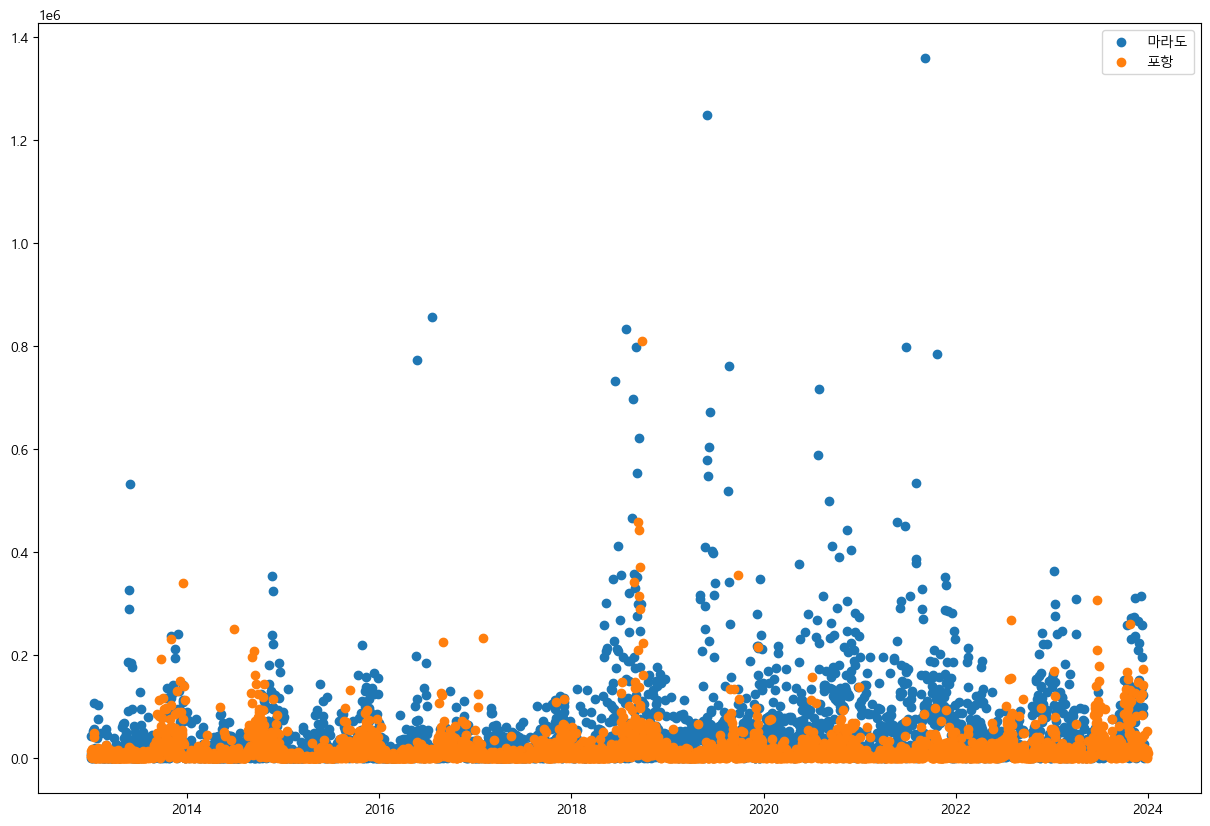

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(mar_test['일자'], mar_test['출하중량'],  label = '마라도')
plt.scatter(poh_test['일자'], poh_test['출하중량'], label = '포항')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# ===== 분석 대상 =====
df = poh_test.copy()
target = '출하중량'
features = [
    '평균기압','평균 상대습도',	'평균 기온','평균 수온','적정수온',	'최근적정수온빈도','최근저수온빈도','최근고수온빈도'
]

n_permutations = 1000
random_state = 0

# ===== Mutual Information + permutation p-value =====
def mi_perm_test_1d(x, y, n_perm=1000, rs=0):
    mask = (~np.isnan(x)) & (~np.isnan(y))
    x_ = x[mask].reshape(-1, 1)
    y_ = y[mask]
    if len(y_) < 5 or np.nanstd(x_) == 0:
        return np.nan, np.nan

    X_scaled = StandardScaler().fit_transform(x_)

    rng = np.random.RandomState(rs)
    mi_true = mutual_info_regression(X_scaled, y_, random_state=rs)[0]

    null = []
    for _ in range(n_perm):
        y_perm = rng.permutation(y_)
        mi_perm = mutual_info_regression(X_scaled, y_perm, random_state=rs)[0]
        null.append(mi_perm)
    null = np.array(null)
    p_val = (null >= mi_true).mean()
    return mi_true, p_val

# ===== 래그 적용용 데이터 준비 =====
df['_date'] = pd.to_datetime(df['일자']) 
df = df.sort_values('_date').reset_index(drop=True)

lags = range(-10, 11)  # -10일 ~ +10일

rows = []

for lag in lags:
    df_lag = df.copy()
    
    for col in features:
        df_lag[f'{col}_lag{lag}'] = df_lag[col].shift(-lag)  # lag가 음수면 미래, 양수면 과거

    Xcols = [f'{col}_lag{lag}' for col in features]
    valid = df_lag[[target] + Xcols].dropna().index

    if len(valid) < 8:
        continue

    y_vec = df_lag.loc[valid, target].to_numpy()

    for col in features:
        x_vec = df_lag.loc[valid, f'{col}_lag{lag}'].to_numpy()

        try:
            pr, pr_p = pearsonr(x_vec, y_vec)
        except Exception:
            pr, pr_p = (np.nan, np.nan)

        try:
            sr, sr_p = spearmanr(x_vec, y_vec)
        except Exception:
            sr, sr_p = (np.nan, np.nan)

        mi, mi_p = mi_perm_test_1d(x_vec, y_vec,
                                   n_perm=n_permutations,
                                   rs=random_state)

        rows.append({
            'Variable': col,
            'Lag': lag,
            'n': len(y_vec),
            'Pearson': pr, 'Pearson_p': pr_p,
            'Spearman': sr, 'Spearman_p': sr_p,
            'MI': mi, 'MI_p': mi_p
        })


# ===== 결과 정리 =====
result_lag = pd.DataFrame(rows)

# 보기 좋게 정렬
result_lag = result_lag.sort_values(['Variable','Lag']).reset_index(drop=True)

# 결과 출력
print(result_lag.head(20))

# MI 기준 상위 변수 보기
print("\n🔎 Mutual Information 기준 Top 10")
print(result_lag.sort_values('MI', ascending=False).head(10))

# 필요 시 저장
result_lag.to_excel("lagged_correlation_analysis_POH_dbd.xlsx", index=False)

   Variable  Lag     n   Pearson     Pearson_p  Spearman     Spearman_p  \
0      적정수온  -10  3537  0.213063  1.363121e-37  0.351831  1.396165e-103   
1      적정수온   -9  3538  0.218977  1.133739e-39  0.349824  2.245638e-102   
2      적정수온   -8  3539  0.221098  1.933041e-40  0.341360   2.731735e-97   
3      적정수온   -7  3540  0.209764  1.708327e-36  0.339372   3.874619e-96   
4      적정수온   -6  3541  0.202594  4.079018e-34  0.333988   5.136263e-93   
5      적정수온   -5  3542  0.207225  1.171285e-35  0.337097   7.475879e-95   
6      적정수온   -4  3543  0.203003  2.871888e-34  0.334598   2.018932e-93   
7      적정수온   -3  3544  0.197178  2.134946e-32  0.331004   2.253696e-91   
8      적정수온   -2  3545  0.189171  6.464014e-30  0.321005   8.981484e-86   
9      적정수온   -1  3546  0.184462  1.645790e-28  0.314981   1.651854e-82   
10     적정수온    0  3547  0.178268  1.027187e-26  0.314649   2.368255e-82   
11     적정수온    1  3546  0.178532  8.776850e-27  0.310194   5.990586e-80   
12     적정수온    2  3545  0

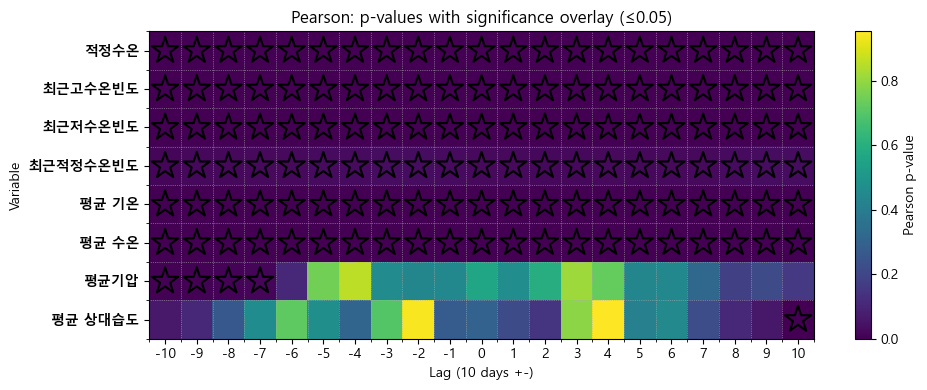

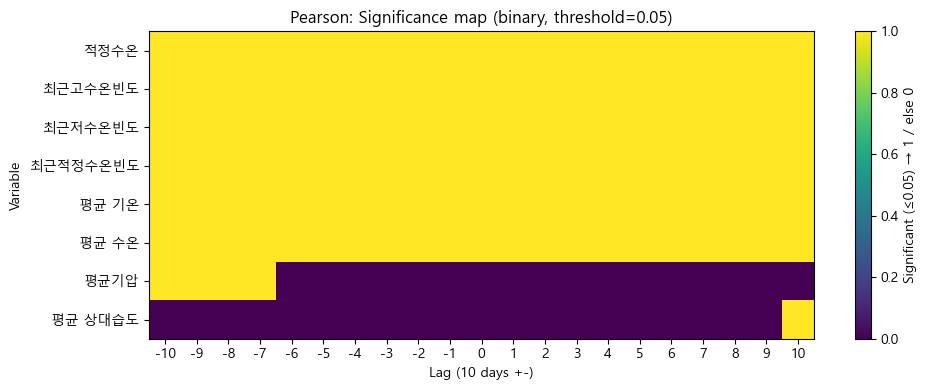

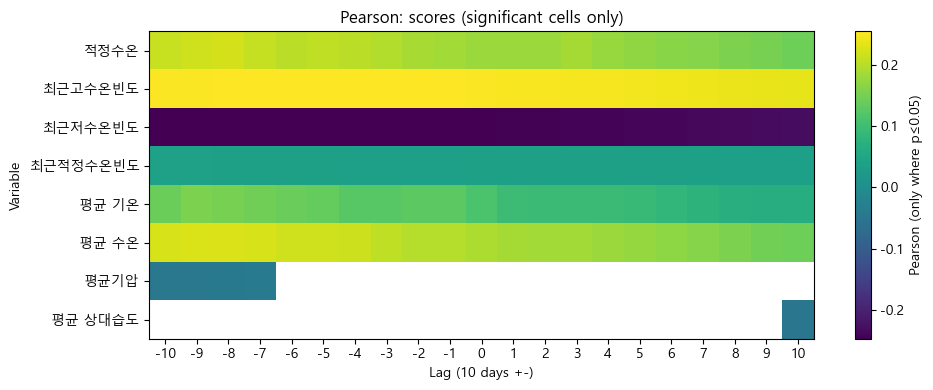

🔎 Pearson 유의성 요약 (임계=0.05)


,n_sig_lags,best_p,best_lag
Variable,,,
최근고수온빈도,21,1.894567e-53,-3
최근저수온빈도,21,3.875837e-50,-9
평균 수온,21,1.085591e-42,-8
적정수온,21,1.933041e-40,-8
평균 기온,21,1.899895e-20,-9
최근적정수온빈도,21,1.849136e-02,-10
평균기압,4,5.913789e-03,-9
평균 상대습도,1,2.796426e-03,10


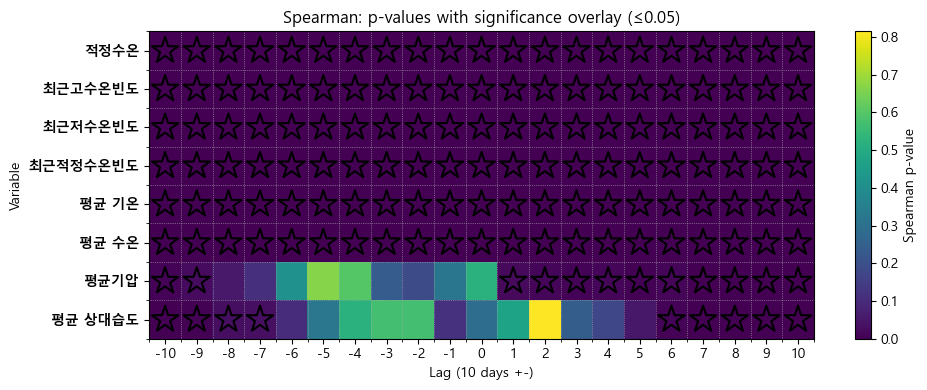

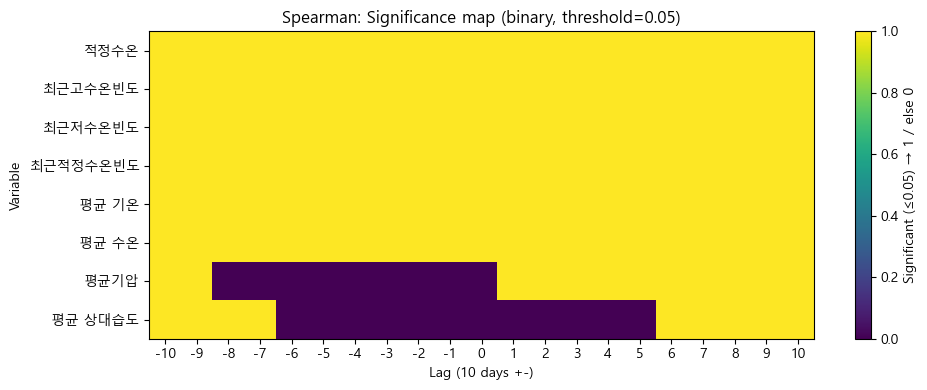

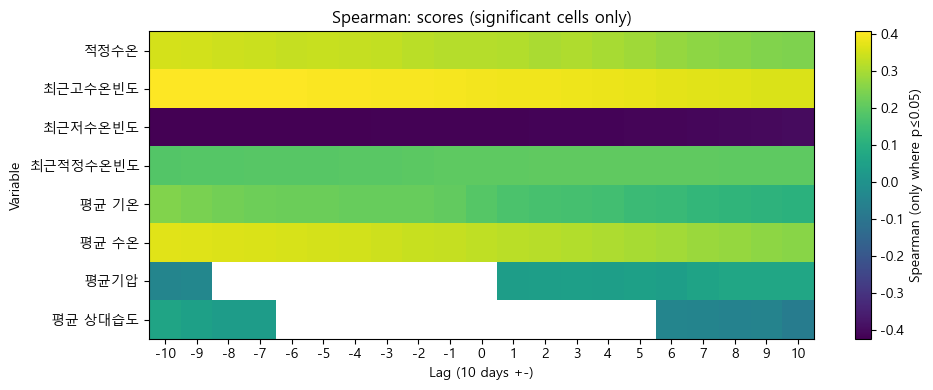

🔎 Spearman 유의성 요약 (임계=0.05)


,n_sig_lags,best_p,best_lag
Variable,,,
최근저수온빈도,21,1.732838e-153,-9
최근고수온빈도,21,1.518656e-140,-9
평균 수온,21,5.269186e-115,-10
적정수온,21,1.396165e-103,-10
평균 기온,21,5.008719e-51,-10
최근적정수온빈도,21,1.502211e-34,3
평균기압,12,4.053642e-05,10
평균 상대습도,9,6.402398e-06,10


In [ ]:
def plot_sig_maps_striking(result_lag, metric_name, thresh=0.05):
    """
    result_lag: columns ['Variable','Lag', metric, metric+'_p'] 필요
    metric_name: 'Pearson' | 'Spearman' | 'MI'
    thresh: 유의수준 (기본 0.05)
    """
    val_col = metric_name
    p_col   = f"{metric_name}_p"

    # 1) 피벗
    v_pivot = result_lag.pivot_table(index='Variable', columns='Lag', values=val_col, aggfunc='first')
    p_pivot = result_lag.pivot_table(index='Variable', columns='Lag', values=p_col,   aggfunc='first')

    # 2) 유의성 기준 및 정렬
    sig_bool = (p_pivot <= thresh)
    sig_counts = sig_bool.sum(axis=1)

    # 정렬: 유의한 lag 개수 ↓, 최저 p ↑
    order = (sig_counts.sort_values(ascending=False)
                        .index.to_series()
                        .reindex(sig_counts.index)
                        .index)
    # 위 한 줄은 pandas 버전에 따라 경고가 나올 수 있으니 더 견고하게:
    order = sig_counts.sort_values(ascending=False).index

    v_pivot = v_pivot.loc[order]
    p_pivot = p_pivot.loc[order]
    sig_bool = sig_bool.loc[order]

    # 3) p-value 히트맵 + ★ 오버레이 (p≤thresh)
    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im = ax.imshow(p_pivot.values, aspect='auto')  # 기본 컬러맵 사용
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f'{metric_name} p-value')

    # 축 라벨
    ax.set_xticks(np.arange(p_pivot.shape[1]))
    ax.set_xticklabels(p_pivot.columns)
    ax.set_yticks(np.arange(p_pivot.shape[0]))
    ax.set_yticklabels(p_pivot.index)

    ax.set_title(f'{metric_name}: p-values with significance overlay (≤{thresh})')
    ax.set_xlabel('Lag (10 days +-)')
    ax.set_ylabel('Variable')

    # 그리드(가로/세로) 약하게 추가
    ax.set_xticks(np.arange(-.5, p_pivot.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, p_pivot.shape[0], 1), minor=True)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)

    # ★ 오버레이 (p ≤ thresh인 셀에 큼직하게 표시)
    rows, cols = np.where(sig_bool.values)
    # 마커를 크게(s) 하고, 테두리(edgecolors='black')로 눈에 띄게
    ax.scatter(cols, rows, marker='*', s=400, edgecolors='black', facecolors='none', linewidths=1.5)

    # 유의한 lag이 하나라도 있는 변수는 라벨을 bold 처리
    for yi, var in enumerate(p_pivot.index):
        if sig_counts.loc[var] > 0:
            ax.get_yticklabels()[yi].set_fontweight('bold')

    plt.tight_layout()
    plt.show()

    # 4) 이진 유의맵 (0/1)
    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im2 = ax.imshow(sig_bool.values.astype(int), aspect='auto')
    cbar2 = plt.colorbar(im2, ax=ax)
    cbar2.set_label(f'Significant (≤{thresh}) → 1 / else 0')
    ax.set_xticks(np.arange(sig_bool.shape[1])); ax.set_xticklabels(sig_bool.columns)
    ax.set_yticks(np.arange(sig_bool.shape[0])); ax.set_yticklabels(sig_bool.index)
    ax.set_title(f'{metric_name}: Significance map (binary, threshold={thresh})')
    ax.set_xlabel('Lag (10 days +-)'); ax.set_ylabel('Variable')
    plt.tight_layout(); plt.show()

    # 5) 유의 구간만 점수 히트맵 (비유의는 NaN → 비워 보임)
    v_sig = v_pivot.copy()
    v_sig.values[~sig_bool.values] = np.nan

    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im3 = ax.imshow(v_sig.values, aspect='auto')
    cbar3 = plt.colorbar(im3, ax=ax)
    cbar3.set_label(f'{metric_name} (only where p≤{thresh})')
    ax.set_xticks(np.arange(v_sig.shape[1])); ax.set_xticklabels(v_sig.columns)
    ax.set_yticks(np.arange(v_sig.shape[0])); ax.set_yticklabels(v_sig.index)
    ax.set_title(f'{metric_name}: scores (significant cells only)')
    ax.set_xlabel('Lag (10 days +-)'); ax.set_ylabel('Variable')
    plt.tight_layout(); plt.show()

    # 6) 요약표: 유의 lag 개수, 최저 p, 그때의 lag
    summary = pd.DataFrame({
        'n_sig_lags': sig_counts,
        'best_p': p_pivot.min(axis=1),
        'best_lag': p_pivot.idxmin(axis=1),
    }).sort_values(['n_sig_lags','best_p'], ascending=[False, True])

    print(f"🔎 {metric_name} 유의성 요약 (임계={thresh})")
    display(summary)  # 주피터 환경일 경우; 터미널이면 print(summary)

    return summary

# 실행 예시 (원하는 것만 호출)
# summary_mi       = plot_sig_maps_striking(result_lag, 'MI',       thresh=0.05)
summary_pearson  = plot_sig_maps_striking(result_lag, 'Pearson',  thresh=0.05)
summary_spearman = plot_sig_maps_striking(result_lag, 'Spearman', thresh=0.05)


In [ ]:
df

NameError: name 'df' is not defined